### Importing necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import re

### Exploratory data analysis

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64


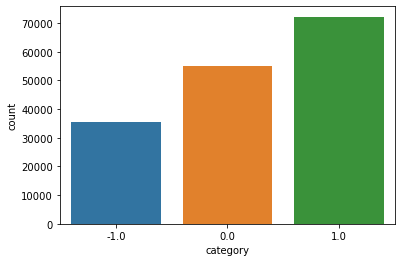

In [3]:
data = pd.read_csv('Twitter_Data.csv')
print(data.head()) # Viewing first 5 datas in dataset
print(data['category'].value_counts())
sns.countplot(x='category', data=data)
plt.show()

### Plotting wordcloud

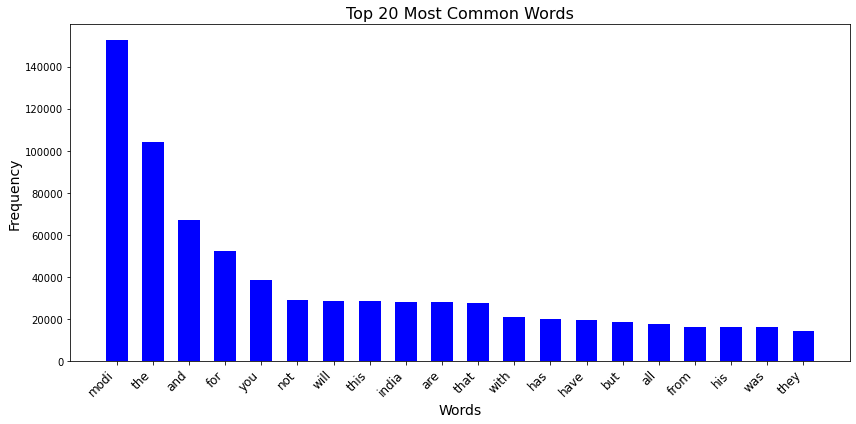

In [4]:
# Tokenize the text into words
words = ' '.join(data['clean_text'].fillna('').astype(str)).split()

# Count word frequencies
word_freq = Counter(words)

# Get the N most common words and their counts
top_n_words = word_freq.most_common(20)  # You can change 20 to your desired number

# Extract words and counts for plotting
words, counts = zip(*top_n_words)

# Create a bar plot with increased bar width
bar_width = 0.6
plt.figure(figsize=(12, 6))
plt.bar(words, counts, width=bar_width, color='blue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Most Common Words', fontsize=16)
plt.tight_layout()
plt.show()

### Data Cleaning

In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Remove punctuation and special characters
        cleaned_text = re.sub(r'[^\w\s]', '', text)
        # Remove stop words
        cleaned_text = ' '.join([word for word in cleaned_text.split() if word.lower() not in stop_words])
        return cleaned_text
    else:
        return ""

data['cleaned_text'] = data['clean_text'].apply(clean_text)
print("Data cleaning completed successfully")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data cleaning completed successfully


### Sample of cleaned data

In [5]:
sample_cleaned_data = data['cleaned_text'].sample(n=5)  # Change 5 to the number of samples you want
for idx, cleaned_text in enumerate(sample_cleaned_data, start=1):
    print(f"Sample {idx}:\n{cleaned_text}\n")

Sample 1:
modi sir please help

Sample 2:
lodu modi created mazacar 2012

Sample 3:
prime minister narendra modi gandhivadra family come back power ever thought one touch despite much corruption nepotism today member family bail times changed people realising

Sample 4:
idea aiming suggest compare modis five yrs five yrs govern dont forget keep mind state nations health took

Sample 5:
affection tea cup manufacturer modi would modi supporter couldnt control emotion



### Tokenization and Pipeline Creation

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=100) # Change this according to the features you want.
X = tfidf_vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train-test split completed successfully")

Train-test split completed successfully


### Cleaning train-test data 

In [19]:
print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())
print(np.isinf(X_train).sum())
print(np.isinf(y_train).sum())

nan_indices = np.isnan(y_train)
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]
y_train[np.isnan(y_train)] = -1 
print("Train data cleansed!!!")

print(np.isnan(X_test).sum())
print(np.isnan(y_test).sum())
print(np.isinf(X_test).sum())
print(np.isinf(y_test).sum())

y_test[np.isnan(y_test)] = -1 
print("NaN values in y_test replaced with -1")

0
0
0
0
Train data cleansed!!!
0
0
0
0
NaN values in y_test replaced with -1


### Training SVM model

In [20]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [21]:
svm_predictions = svm_classifier.predict(X_test)
print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))

SVM Classifier:
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00     48793
         0.0       0.00      0.60      0.00        50
         1.0       0.41      0.65      0.50        43

    accuracy                           0.00     48886
   macro avg       0.47      0.42      0.17     48886
weighted avg       1.00      0.00      0.00     48886



### Training naive bayes model 

In [22]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [23]:
nb_predictions = nb_classifier.predict(X_test)
print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Classifier:
              precision    recall  f1-score   support

        -1.0       0.50      0.00      0.00     48793
         0.0       0.56      0.48      0.52        50
         1.0       0.00      0.72      0.00        43

    accuracy                           0.00     48886
   macro avg       0.35      0.40      0.17     48886
weighted avg       0.50      0.00      0.00     48886



### Training KNN model

In [24]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
knn_predictions = knn_classifier.predict(X_test)
print("KNN Classifier:")
print(classification_report(y_test, knn_predictions))

KNN Classifier:
              precision    recall  f1-score   support

        -1.0       0.38      0.00      0.00     48793
         0.0       0.00      0.82      0.00        50
         1.0       0.31      0.12      0.17        43

    accuracy                           0.00     48886
   macro avg       0.23      0.31      0.06     48886
weighted avg       0.37      0.00      0.00     48886

